# Introduction to Regression with Neural Networks in TensorFlow

In [63]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.18.0


## Creating data to view and fit

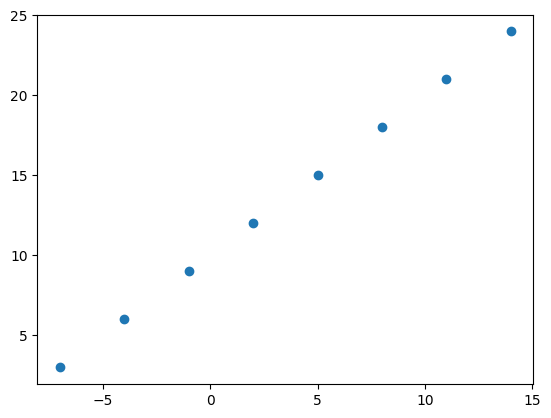

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [65]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [66]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [67]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [68]:
X[0], y[0]

(np.float64(-7.0), np.float64(3.0))

In [69]:
# Turn our NumPy arrays into tensors with dtpye float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [70]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

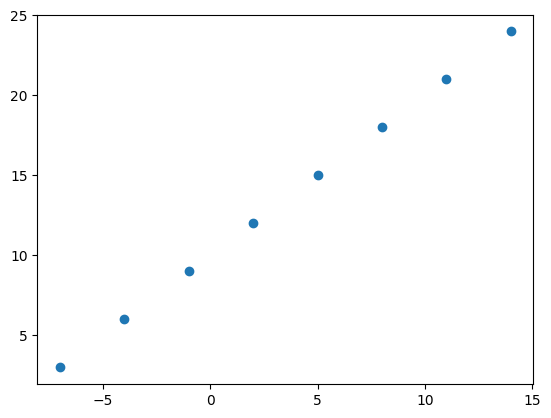

In [71]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow
1. Creating a model.
2. Compiling a model.
3. Fitting a model.
4. Evaluate the model.

In [72]:
X = tf.expand_dims(X, axis=-1)

In [73]:
# Reshape X to have an additional dimension for the batch size

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ["mae"])

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.2111 - mae: 9.2111
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - loss: 9.0786 - mae: 9.0786
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - loss: 8.9461 - mae: 8.9461
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - loss: 8.8136 - mae: 8.8136
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - loss: 8.6811 - mae: 8.6811


In [74]:
# checkout X and y
X,y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [75]:
# Try and make a prediction using oir model
new_input = tf.constant([[17.0]])
y_pred = model.predict(new_input)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


array([[23.856575]], dtype=float32)

## Improving our model



We can improve our model, b altering the steps we took to create a model
1. **Creating a model** - here we might add more layers, increase the number of hidden layers units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model**- here we might change the optimisation function, or perhaps the **learning rate** of the optimisation function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it train in for longer) or more data (give the model more examples to learn from).

In [76]:
# Reshape X to have an additional dimension for the batch size
# = tf.expand_dims(X, axis=-1)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    ])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 12.0821 - mae: 12.0821
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 11.9496 - mae: 11.9496
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 11.8171 - mae: 11.8171
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 11.6846 - mae: 11.6846
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 11.5521 - mae: 11.5521
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 11.4196 - mae: 11.4196
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 11.2871 - mae: 11.2871
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 11.1546 - mae: 11.1546
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 11.0221 - mae: 11.0221
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 10.8896 - mae: 10.8896
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 10.7571 - mae: 10.7571
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 10.6246 - mae: 10.6246
Epoch 13/100
1/1 ━━━━━━━━━

In [77]:
X, y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [78]:
model.predict(tf.constant([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


array([[29.744595]], dtype=float32)

In [79]:
import tensorflow as tf

# Let's make another improvementimprovement

# 1. Create the model (add extr hidden layer with 100 hidden units)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 12.4598 - mae: 12.4598
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 11.6160 - mae: 11.6160
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 10.7863 - mae: 10.7863
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 10.1227 - mae: 10.1227
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 9.5299 - mae: 9.5299
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 8.9223 - mae: 8.9223
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 8.2959 - mae: 8.2959
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 7.6541 - mae: 7.6541
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 6.9875 - mae: 6.9875
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 6.2934 - mae: 6.2934
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 5.5705 - mae: 5.5705
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 4.8172 - mae: 4.8172
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54

In [80]:
model.predict(tf.constant([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


array([[27.157133]], dtype=float32)

**Note:**

The `learning_rate` is the most important hyperparameter of many different neural networks.

## Evaluating a model

In practice, a typing workflow you'll go through when building neural networks is:

```
Building a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation... there are 3 words you should memorize:
> "visualize, visualize, visualize"

It's a good idea to visualize:
* The data
* The model itself
* The training of a model - how does a model perform while it learns?
* The predictions of the model

In [81]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [82]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

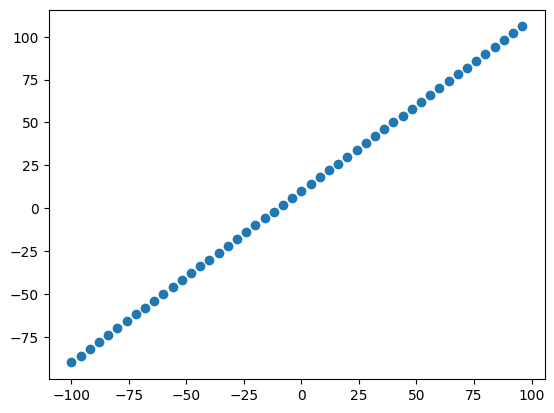

In [83]:
# visualize it

import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets...

* Training set (70-80% of data)
* Validation set (10-15% of data)
* Test set (10-15% of data)

In [84]:
len(X)

50

In [85]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80%)
y_train = y[:40] # last 10

X_test = X[40:]
y_test = y[40:]

### Visualize the data

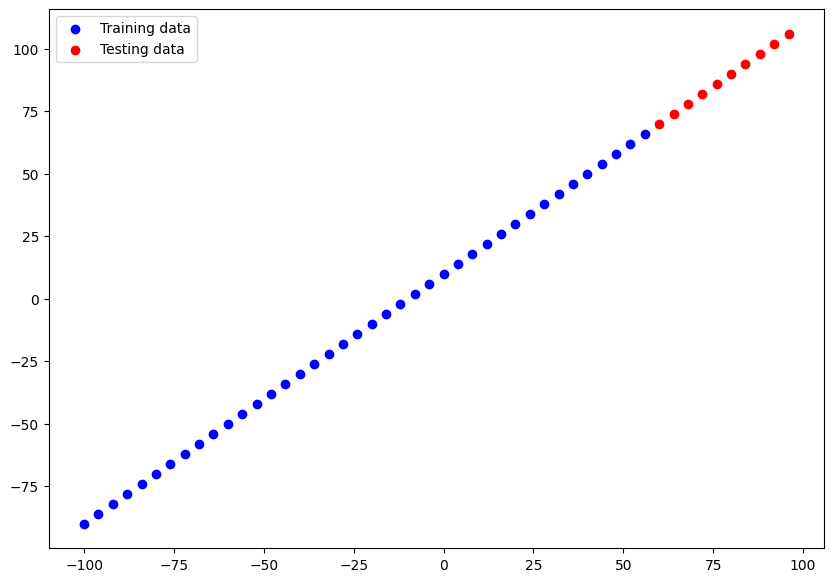

In [86]:
plt.figure(figsize=(10, 7))

# plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")

# plot test data in red
plt.scatter(X_test, y_test, c="r", label="Testing data")

# Show legend
plt.legend();

In [87]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

### Visualizing the model

In [88]:
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [106]:

# Let's create a model which builds automatically by defining the input_input_shape
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# compile the model
model.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.SGD(),
                    metrics=["mae"])

In [107]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [108]:
# let's fit

model.fit(X_train, y_train, epochs=100, verbose=0)

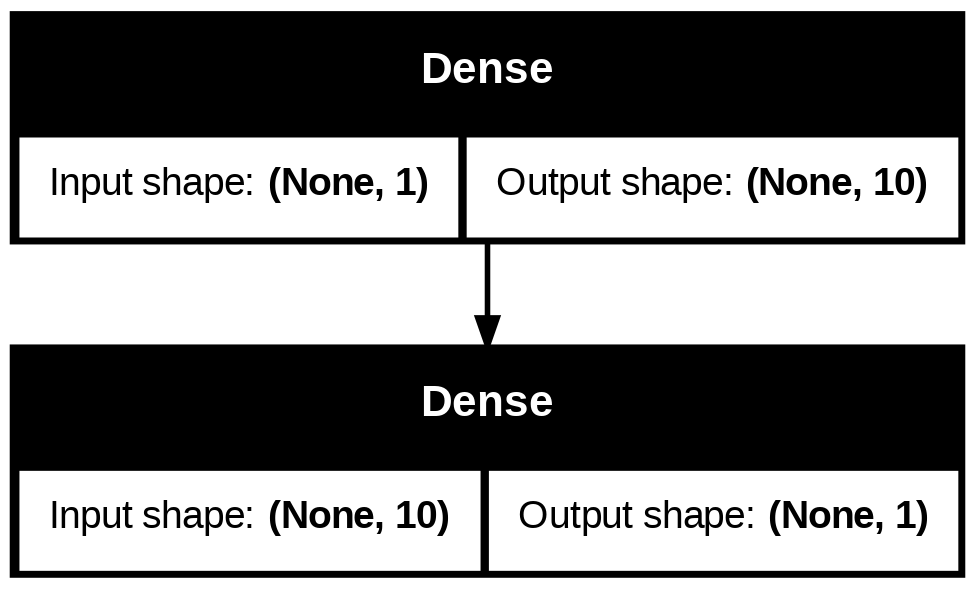

In [109]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions